In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [46]:
data=pd.read_csv('/content/green_tech_data.csv')

In [47]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [48]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [49]:
def is_balanced(data, column_name):

    value_counts = data[column_name].value_counts()
    # Define a threshold for imbalance (e.g., 10% difference)
    threshold = 0.1
    max_count = value_counts.max()
    min_count = value_counts.min()
    if max_count / (min_count + 1e-8) < (1 + threshold) : # Add a small value to avoid division by zero
        return True  # Values are balanced
    else:
        return False  # Values are imbalanced

is_sustainability_balanced = is_balanced(data, 'sustainability')

if is_sustainability_balanced:
    print("The 'sustainability' column is balanced.")
else:
    print("The 'sustainability' column is imbalanced.")

The 'sustainability' column is imbalanced.


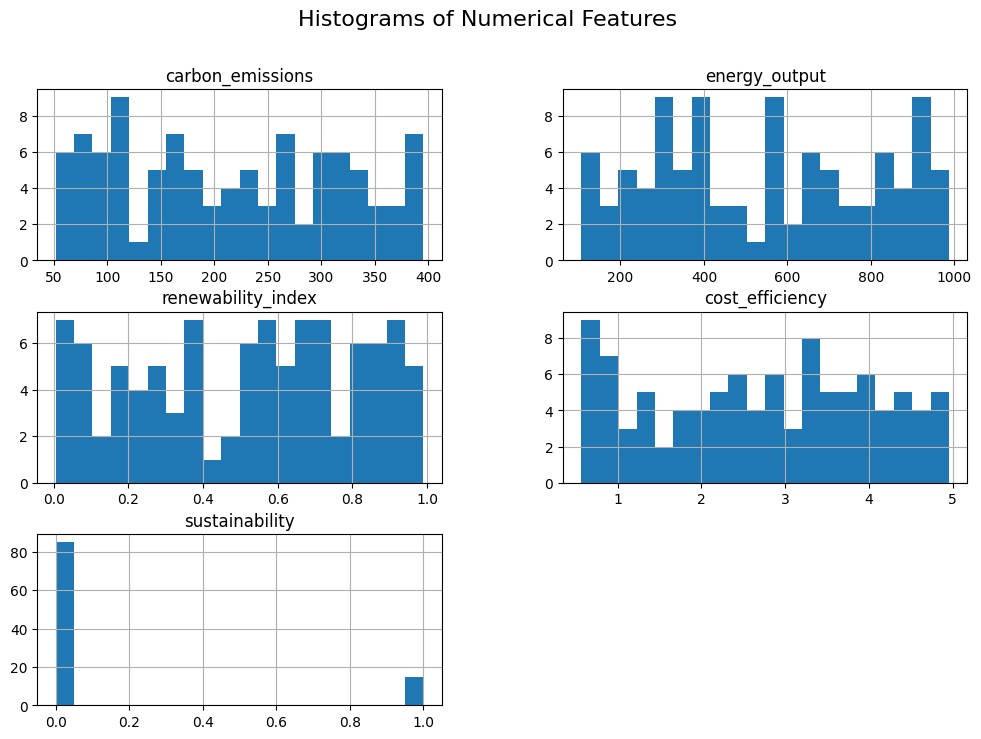

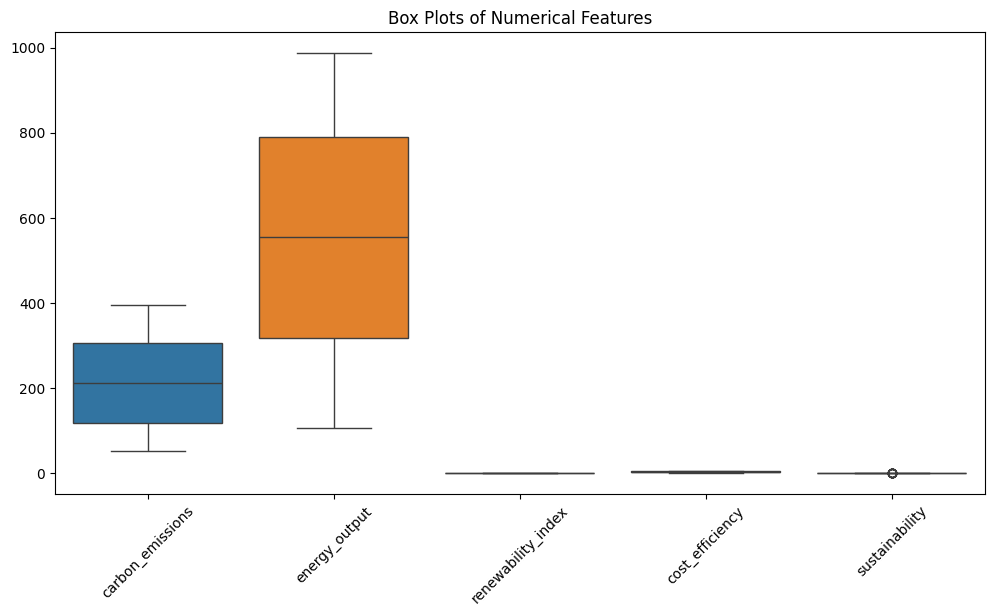

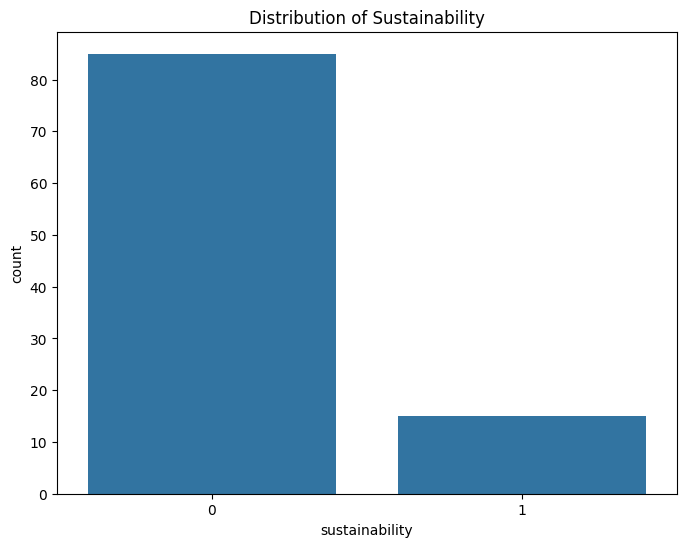

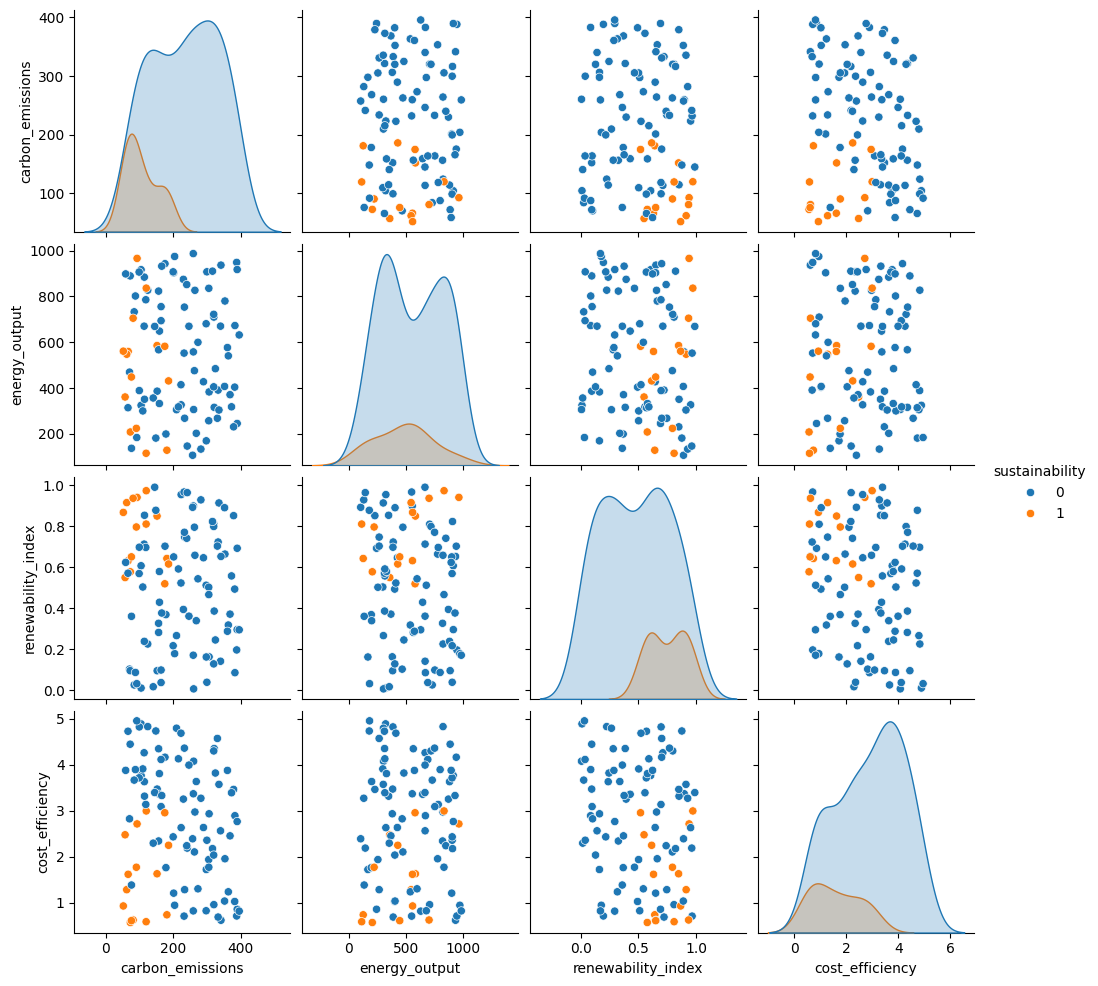

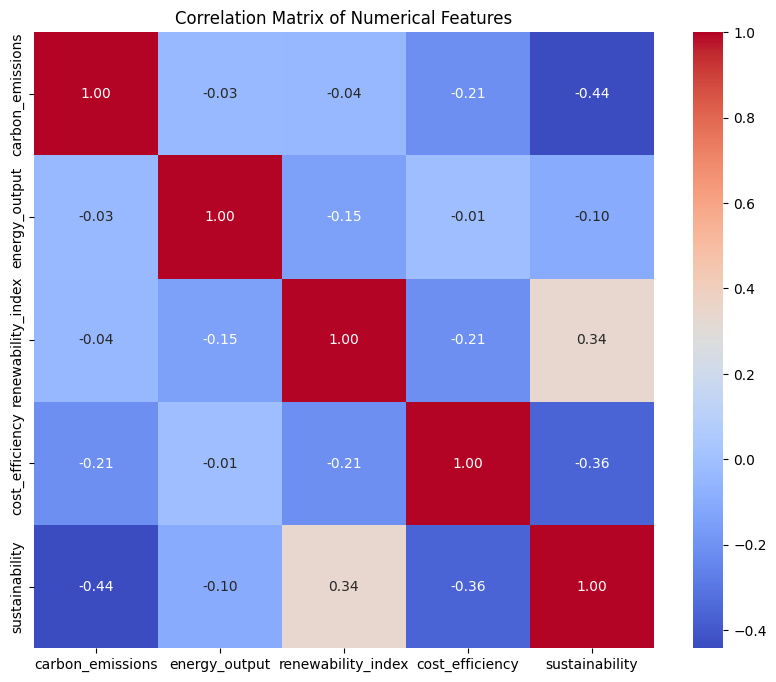

The 'sustainability' column is imbalanced.


In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data=pd.read_csv('/content/green_tech_data.csv')

# Data Exploration and Visualization
# 1. Histograms for Numerical Features
numerical_features = data.select_dtypes(include=np.number).columns
data[numerical_features].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# 2. Boxplots for Numerical Features
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# 3. Countplot for Categorical Feature 'sustainability'
plt.figure(figsize=(8, 6))
sns.countplot(x='sustainability', data=data)
plt.title("Distribution of Sustainability")
plt.show()

# 4. Pairplot for Relationships between Numerical Features and Sustainability
sns.pairplot(data, hue='sustainability', vars=numerical_features[:4]) # Limiting to first 4 for clarity
plt.show()

# 5. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


def is_balanced(data, column_name):
    value_counts = data[column_name].value_counts()
    # Define a threshold for imbalance (e.g., 10% difference)
    threshold = 0.1
    max_count = value_counts.max()
    min_count = value_counts.min()
    if max_count / (min_count + 1e-8) < (1 + threshold) : # Add a small value to avoid division by zero
        return True  # Values are balanced
    else:
        return False  # Values are imbalanced

is_sustainability_balanced = is_balanced(data, 'sustainability')

if is_sustainability_balanced:
    print("The 'sustainability' column is balanced.")
else:
    print("The 'sustainability' column is imbalanced.")

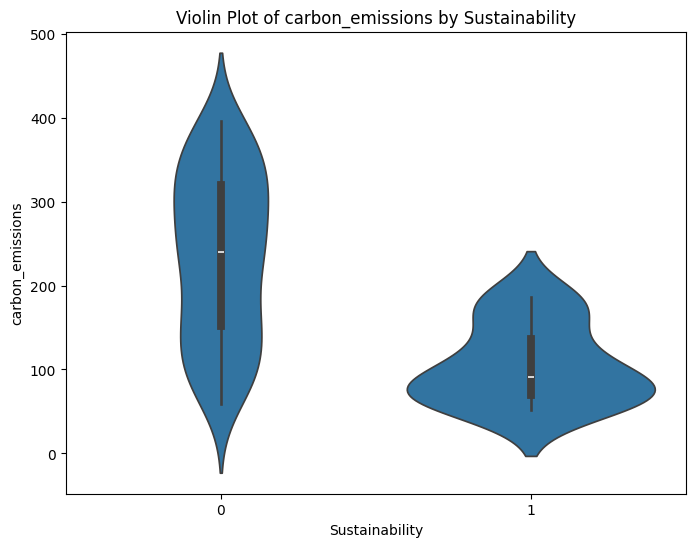

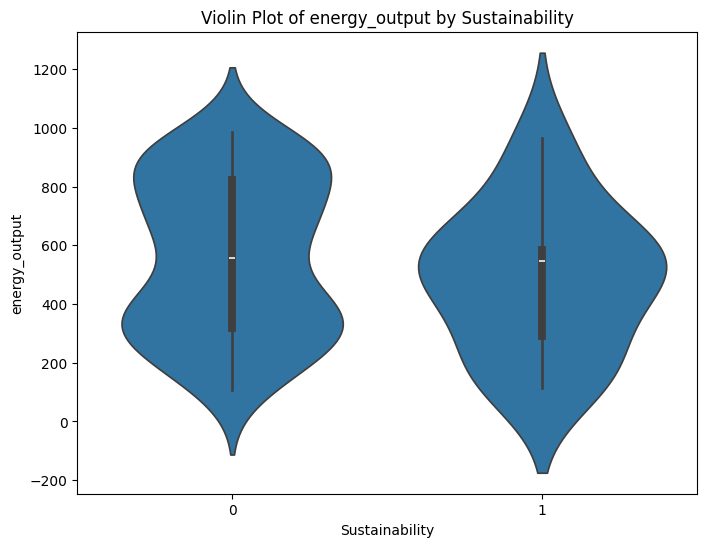

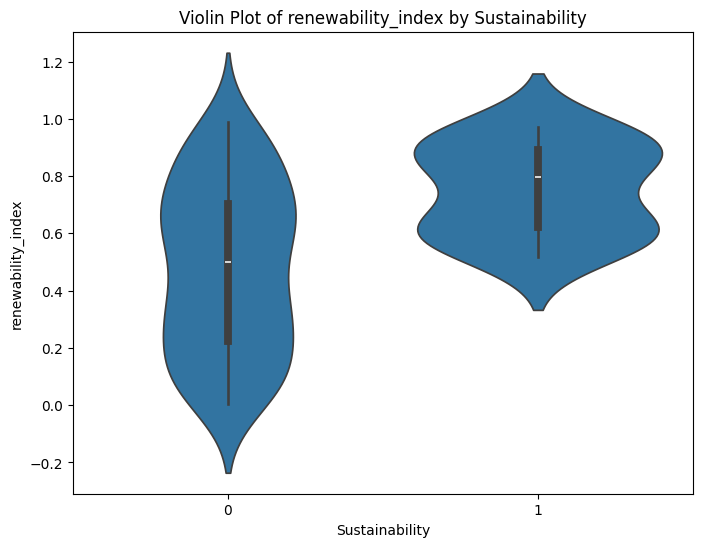

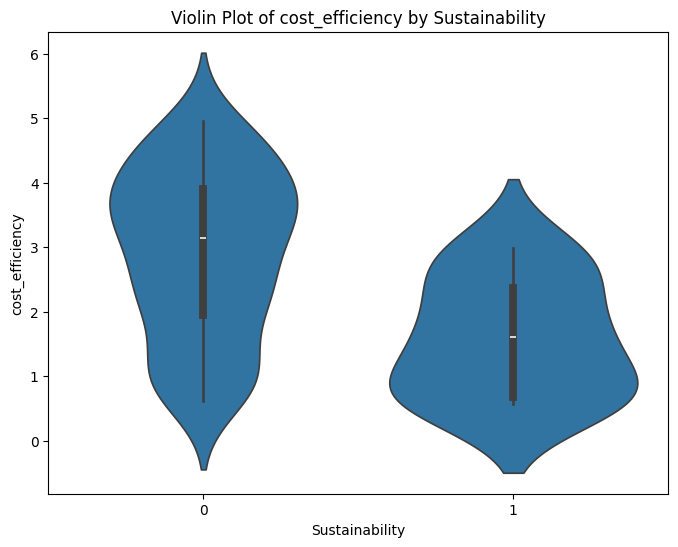

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=data, x='sustainability', y=col)
    plt.title(f'Violin Plot of {col} by Sustainability')
    plt.xlabel('Sustainability')
    plt.ylabel(col)
    plt.show()

In [52]:
x=data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [55]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.95


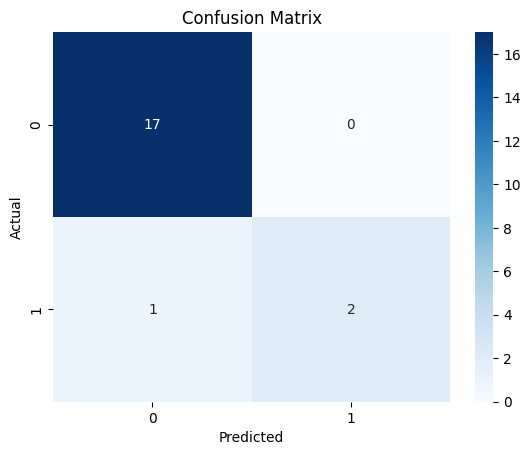

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [60]:
cofficients=pd.DataFrame(model.coef_[0], index=x.columns, columns=['Coefficient'])
print(cofficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [61]:
import joblib
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [62]:

import joblib

# Load the trained model
loaded_model = joblib.load('lrmodel_sustainable.pkl')


new_data = pd.DataFrame({
    'carbon_emissions': [2.5],
    'renewability_index': [0.8],
    'cost_efficiency': [0.7]
})

predictions = loaded_model.predict(new_data)

print(f"Prediction: {predictions[0]}")


Prediction: 1


In [63]:
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
